## Linear & Non-Linear Models
## Homework #5: Proportional Hazard Model
### Luke Schwenke
### March 1, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline
from sklearn import metrics
import statsmodels.api as sm
import os
from lifelines import CoxPHFitter

In [3]:
df = pd.read_csv('myeloma.csv')
df.head()

,Time,VStatus,LogBUN,HGB,Platelet,Age,LogWBC,Frac,LogPBM,Protein,SCalc
0,1.25,1,2.2175,9.4,1,67,3.6628,1,1.9542,12,10
1,1.25,1,1.9395,12.0,1,38,3.9868,1,1.9542,20,18
2,2.00,1,1.5185,9.8,1,81,3.8751,1,2.0000,2,15
3,2.00,1,1.7482,11.3,0,75,3.8062,1,1.2553,0,12
4,2.00,1,1.3010,5.1,0,57,3.7243,1,2.0000,3,9


### Pre-Steps - Cox Proportional Hazard Model

In [4]:
cph = CoxPHFitter()
cph_model = cph.fit(df, duration_col='Time', event_col='VStatus')
cph_model.print_summary()

<lifelines.CoxPHFitter: fitted with 65 total observations, 17 right-censored observations>
             duration col = 'Time'
                event col = 'VStatus'
      baseline estimation = breslow
   number of observations = 65
number of events observed = 48
   partial log-likelihood = -145.39
         time fit was run = 2023-02-24 18:39:20 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
LogBUN      1.86       6.40       0.66             0.57             3.14                 1.77                23.15
HGB        -0.13       0.88       0.07            -0.27             0.02                 0.77                 1.02
Platelet   -0.25       0.78       0.51            -1.26             0.75                 0.28                 2.11
Age        -0.01       0.99       0.02            -0.05             0.03                 0.95                 1.03
LogWBC      0.35       1.42       0.72            -1.05             1.76                 0.35                 5.79
Frac        0.34       1.41       0.41            -0.46             1.14                 0.63                 3.13
LogPBM      0.38       1.46       0.49            -0.57             1.34                 0.56                 3.81
Protein     0.01       1.01       0.03            -0.04             0.06                 0.96                 1.07
SCalc       0.13       1.14       0.11            -0.08             0.34                 0.93                 1.40

            cmp to     z      p   -log2(p)
covariate                                 
LogBUN        0.00  2.83 <0.005       7.74
HGB           0.00 -1.75   0.08       3.64
Platelet      0.00 -0.50   0.62       0.69
Age           0.00 -0.67   0.50       0.99
LogWBC        0.00  0.49   0.62       0.69
Frac          0.00  0.84   0.40       1.32
LogPBM        0.00  0.78   0.43       1.21
Protein       0.00  0.50   0.62       0.69
SCalc         0.00  1.24   0.22       2.21
---
Concordance = 0.68
Partial AIC = 308.77
log-likelihood ratio test = 17.62 on 9 df
-log2(p) of ll-ratio test = 4.65

### Part (a) - Backwards Stepwise Regression

In [5]:
cph_model.print_summary()

<lifelines.CoxPHFitter: fitted with 65 total observations, 17 right-censored observations>
             duration col = 'Time'
                event col = 'VStatus'
      baseline estimation = breslow
   number of observations = 65
number of events observed = 48
   partial log-likelihood = -145.39
         time fit was run = 2023-02-24 18:39:20 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
LogBUN      1.86       6.40       0.66             0.57             3.14                 1.77                23.15
HGB        -0.13       0.88       0.07            -0.27             0.02                 0.77                 1.02
Platelet   -0.25       0.78       0.51            -1.26             0.75                 0.28                 2.11
Age        -0.01       0.99       0.02            -0.05             0.03                 0.95                 1.03
LogWBC      0.35       1.42       0.72            -1.05             1.76                 0.35                 5.79
Frac        0.34       1.41       0.41            -0.46             1.14                 0.63                 3.13
LogPBM      0.38       1.46       0.49            -0.57             1.34                 0.56                 3.81
Protein     0.01       1.01       0.03            -0.04             0.06                 0.96                 1.07
SCalc       0.13       1.14       0.11            -0.08             0.34                 0.93                 1.40

            cmp to     z      p   -log2(p)
covariate                                 
LogBUN        0.00  2.83 <0.005       7.74
HGB           0.00 -1.75   0.08       3.64
Platelet      0.00 -0.50   0.62       0.69
Age           0.00 -0.67   0.50       0.99
LogWBC        0.00  0.49   0.62       0.69
Frac          0.00  0.84   0.40       1.32
LogPBM        0.00  0.78   0.43       1.21
Protein       0.00  0.50   0.62       0.69
SCalc         0.00  1.24   0.22       2.21
---
Concordance = 0.68
Partial AIC = 308.77
log-likelihood ratio test = 17.62 on 9 df
-log2(p) of ll-ratio test = 4.65

In [19]:
# Get the initial list of predictor variables
variables = list(df.columns)

# Set significance threshold
threshold = 0.15
print('The significance threshold for the CPH backward elimination is', threshold, '\n')

# Perform backward elimination
while True:
    # Fit the CPH model with the current set of predictor variables
    cph.fit(df[variables], duration_col='Time', event_col='VStatus')
    
    # Store the p-values of each predictor
    p_values = cph.summary['p']
    
    # Find the predictor with the highest p-value
    max_p_value = p_values.max()
    if max_p_value > threshold:
        # Remove the predictor with the highest p-value
        variable_to_remove = cph.summary.loc[cph.summary['p'] == max_p_value].index[0]
        print(variable_to_remove, 'will be removed. It has a significance value of', round(max_p_value,3))
        variables.remove(variable_to_remove)
    else:
        print('\nThe CPH backward elimination is complete.')
        break

# Print the final CPH model summary with the eliminated variables removed
step_model = cph.fit(df[variables], duration_col='Time', event_col='VStatus')
print(step_model.print_summary())

The significance threshold for the CPH backward elimination is 0.15 

LogWBC will be removed. It has a significance value of 0.621
Protein will be removed. It has a significance value of 0.693
Platelet will be removed. It has a significance value of 0.656
LogPBM will be removed. It has a significance value of 0.452
Frac will be removed. It has a significance value of 0.426
Age will be removed. It has a significance value of 0.181
SCalc will be removed. It has a significance value of 0.174

The CPH backward elimination is complete.


<lifelines.CoxPHFitter: fitted with 65 total observations, 17 right-censored observations>
             duration col = 'Time'
                event col = 'VStatus'
      baseline estimation = breslow
   number of observations = 65
number of events observed = 48
   partial log-likelihood = -148.06
         time fit was run = 2023-02-24 18:47:45 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
LogBUN      1.72       5.56       0.62             0.50             2.93                 1.65                18.70
HGB        -0.12       0.89       0.06            -0.23            -0.01                 0.79                 0.99

            cmp to     z    p   -log2(p)
covariate                               
LogBUN        0.00  2.77 0.01       7.50
HGB           0.00 -2.08 0.04       4.75
---
Concordance = 0.67
Partial AIC = 300.12
log-likelihood ratio test = 12.27 on 2 df
-log2(p) of ll-ratio test = 8.85

None


### Part (b) - List Summary Values

In [20]:
# List final variables & Parameter Estimates

step_model.summary['coef']

covariate
LogBUN    1.715977
HGB      -0.119663
Name: coef, dtype: float64

In [21]:
# Standard Errors

step_model.summary['se(coef)']

covariate
LogBUN    0.618553
HGB       0.057422
Name: se(coef), dtype: float64

In [22]:
# P-values

step_model.summary['p']

covariate
LogBUN    0.005534
HGB       0.037169
Name: p, dtype: float64

In [23]:
# Hazard Ratios

step_model.hazard_ratios_

# Alternative: step_model.summary['exp(coef)']

covariate
LogBUN    5.562106
HGB       0.887219
Name: exp(coef), dtype: float64

In [24]:
# 95% Confidence Interval for Hazard Ratios

step_model.summary.iloc[:,5:7]

,exp(coef) lower 95%,exp(coef) upper 95%
covariate,,
LogBUN,1.654725,18.696171
HGB,0.792781,0.992908


### Part (c) - Baseline Hazard Plot

<AxesSubplot:>

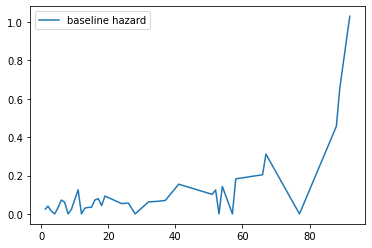

In [25]:
step_model.baseline_hazard_.plot()

There is a **~15% chance** that individuals will experience an event at time 40 given they survive up to that point.

### Part (d) - Partial Effects on Outcome

<AxesSubplot:>

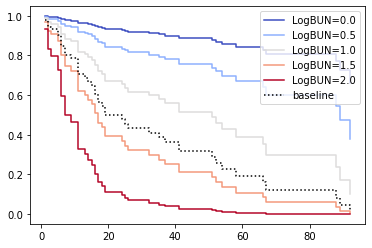

In [26]:
step_model.plot_partial_effects_on_outcome(covariates='LogBUN', 
                                                    values=[0,0.5,1,1.5,2], 
                                                    cmap='coolwarm')

The above plot shows what the survival curve looks like 
as we vary the single covariate, LogBUN, while holding everything else equal.